In [1]:
import numpy as np

In [42]:
from typing import List
class Perceptron:
    def __init__(self,eta:float,n_iter:int, random_state:int, init_weight:bool, weights:List[int],shuffle:bool, f_activate:str):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.init_weight = init_weight
        self.weights = weights
        self.shuffle = shuffle
        self.f_activate = f_activate
        self.errors = []
    
    def _initialize_weights(self, num_features):
        if self.init_weight:
            if self.random_state is not None:
                np.random.seed(self.random_state)
            self.weights = np.random.normal(loc=0.0, scale=0.01, size=num_features + 1)
        else:
            self.weights = np.zeros(num_features + 1)

    def _activate(self, z):
        if self.f_activate == 'step':
            return 1 if z >= 0 else 0
        elif self.f_activate == 'sign':
            return np.sign(z)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        z = self.net_input(X)
        return self._activate(z)       
    
    def fit(self, X, y):
        if self.weights is None:
            num_features = X.shape[1]
            self._initialize_weights(num_features)
        if self.n_iter <= 0:  # Entrenar hasta que todos los ejemplos hayan sido aprendidos
            epoch = 0
            while True:
                if self.shuffle:
                    indices = np.random.permutation(len(y))
                    X, y = X[indices], y[indices]
                errors = 0
                for xi, t in zip(X, y):
                    update = self.eta * (t - self.predict(xi))
                    self.weights[1:] += update * xi
                    self.weights[0] += update
                    errors += int(update != 0)
                self.errors.append(errors)
                epoch += 1
                if errors == 0:
                    break
        else:  # Entrenar durante un número fijo de iteraciones
            for _ in range(self.n_iter):
                if self.shuffle:
                    indices = np.random.permutation(len(y))
                    X, y = X[indices], y[indices]
                errors = 0
                for xi, t in zip(X, y):
                    update = self.eta * (t - self.predict(xi))
                    self.weights[1:] += update * xi
                    self.weights[0] += update
                    errors += int(update != 0)
                self.errors.append(errors)

    
        
    

In [38]:
datos = [[1,1],[1,-1],[-1,1],[-1,-1]]
X = np.array(datos)
y = [1,-1,-1,-1]

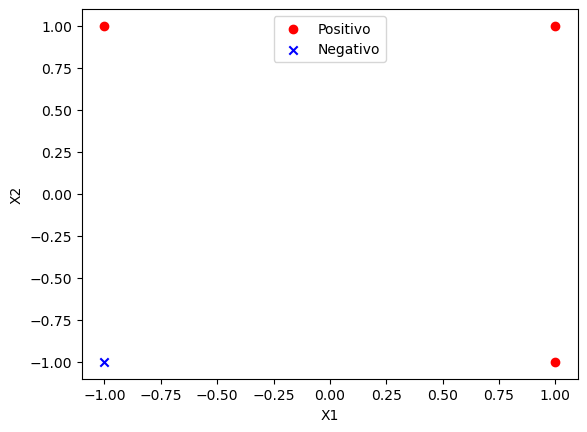

In [39]:

%matplotlib inline
import matplotlib.pyplot as plt

#visualizar los datos
plt.scatter(X[0:3, 0], X[0:3, 1], color = 'red', marker = 'o', label = 'Positivo')
plt.scatter(X[3, 0], X[3, 1], color = 'blue', marker = 'x', label = 'Negativo')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper center')

plt.show()

In [43]:
ppn =Perceptron(eta=0.5, n_iter=0, random_state=3, init_weight=False,weights=[0,0,0], shuffle=False, f_activate='step')
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Numero de actualizaciones')
plt.show()

KeyboardInterrupt: 

In [35]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surface
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl,1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor  = 'black')
    

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()